In [104]:
import pandas as pd
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from statsmodels.stats import multitest, proportion
from itertools import combinations
sns.set_style("darkgrid")
%matplotlib inline

In [34]:
data = pd.DataFrame(load_wine()['data'])
data.columns=load_wine()['feature_names']
data['target']=pd.Series(load_wine()['target'])
data['wine_class'] = data['target'].apply(lambda x:'class_{}'.format(x))
del data['target']

In [35]:
#print (load_wine()['DESCR'])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


1. Основы описательной статистики
2. Средства визуализации данных
3. Меры различий для несвязанных выборок
4. Р-уровень значимости
5. Основы дисперсионного анализа
6. Многофакторный дисперсионный анализ
7. Критерии различий для связанных выборок
8. Дисперсионный анализ с повторными измерениями
9. Основы корреляционного анализа
10. Основы регрессивного анализа
11. Логистическая регрессия и дискриминантный анализ
12. Основы математического моделирования
13. Основы кластерного анализа
14. Основы фактурного анализа

**Основы описательной статистики**

In [36]:
#Мода, медиана, среднее значение 
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [37]:
cols_uniqueness = []
for col in data.columns:
    cols_uniqueness.append([col,len(data[col].unique()), data.shape[0]])
pd.DataFrame(cols_uniqueness).sort_values([1])

,0,1,2
13,wine_class,3,178
7,nonflavanoid_phenols,39,178
4,magnesium,53,178
3,alcalinity_of_ash,63,178
10,hue,78,178
2,ash,79,178
5,total_phenols,97,178
8,proanthocyanins,101,178
12,proline,121,178
11,od280/od315_of_diluted_wines,122,178


**`Меры центральной тенденции`**

In [38]:
#calculate moda, median, average for feature = 'magnesium'
#DataFrame.cumsum(axis=None, skipna=True, *args, **kwargs
freq_destrib = (data['magnesium'].value_counts()).reset_index().rename(columns={'index':'magnesium','magnesium':'cnt'})
#freq_destrib.loc[48,'cnt']=2
freq_destrib['cnt_prcnt']=freq_destrib['cnt']/float(freq_destrib['cnt'].sum())
freq_destrib=freq_destrib.sort_values(['magnesium'])
freq_destrib['cum_prcnt'] = freq_destrib.cumsum()['cnt_prcnt']
# moda:
moda = freq_destrib[freq_destrib['cnt']==freq_destrib['cnt'].max()]['magnesium'].values[0]

#mediana:
mediana = np.percentile(data['magnesium'].values,50)
med1 = freq_destrib[freq_destrib['cum_prcnt']>=0.5].values[0][0]
for_med2 = sorted(list(data['magnesium']))
if data.shape[0]%2==0:
    med_ind = data.shape[0]//2
    med2 = (for_med2[med_ind]+for_med2[med_ind+1])/2.
else:
    med_ind = data.shape[0]//2+1
    med2 = for_med2[med_ind]

avg1 = (freq_destrib['magnesium']*freq_destrib['cnt']).sum()/(float(freq_destrib['cnt'].sum()))
avg2 = data['magnesium'].mean()
avg3 = (freq_destrib['magnesium']*freq_destrib['cnt']).sum()/(float(freq_destrib['cnt'].sum()-1))

print('''
    Moda = {},\n
    Mediana(50% percentile) = {},\n
    Mediana(==0.5 by cumpercentile destribution) = {},\n
    Mediana(as middle element) = {},\n
    Average(by freq distrib) = {},\n
    Average(pandas func) = {},\n
    Average(by freq distrib,sampled)={}
'''.format(moda,mediana,med1,med2,avg1,avg2,avg3))
freq_destrib.head(10)


    Moda = 88.0,

    Mediana(50% percentile) = 98.0,

    Mediana(==0.5 by cumpercentile destribution) = 98.0,

    Mediana(as middle element) = 98.0,

    Average(by freq distrib) = 99.74157303370787,

    Average(pandas func) = 99.74157303370787,

    Average(by freq distrib,sampled)=100.30508474576271



,magnesium,cnt,cnt_prcnt,cum_prcnt
46,70.0,1,0.005618,0.005618
20,78.0,3,0.016854,0.022472
9,80.0,5,0.028090,0.050562
47,81.0,1,0.005618,0.056180
51,82.0,1,0.005618,0.061798
27,84.0,3,0.016854,0.078652
7,85.0,6,0.033708,0.112360
1,86.0,11,0.061798,0.174157
26,87.0,3,0.016854,0.191011
0,88.0,13,0.073034,0.264045


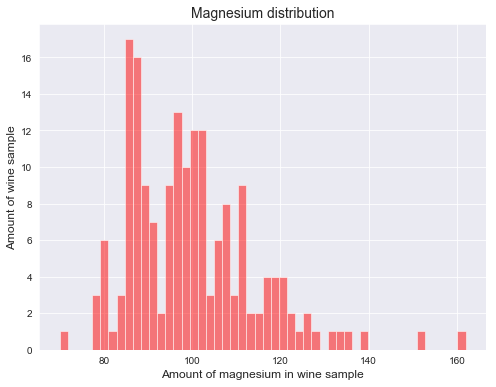

In [39]:
plt.figure(figsize=(8,6))
plt.title('Magnesium distribution',fontsize=14) 
plt.hist(data['magnesium'],bins=50,color='r',alpha=0.5)
plt.ylabel('Amount of wine sample',fontsize=12)
plt.xlabel('Amount of magnesium in wine sample',fontsize=12)
plt.show()

In [40]:
# Усеченное среднее: перед вычислением среднего следует избавиться от выбросов - от 5-10% самых больших и самых маленьких значений
useq_freq_destrib = freq_destrib[(freq_destrib['cum_prcnt']>=0.07)&(freq_destrib['cum_prcnt']<=0.93)]
useq_avg = (useq_freq_destrib['cnt']*useq_freq_destrib['magnesium']).sum()/float(useq_freq_destrib['cnt'].sum())
print('Усеченное среднее (приближается к медиане(?)={}) = {}'.format(mediana,useq_avg))

Усеченное среднее (приближается к медиане(?)=98.0) = 98.45454545454545


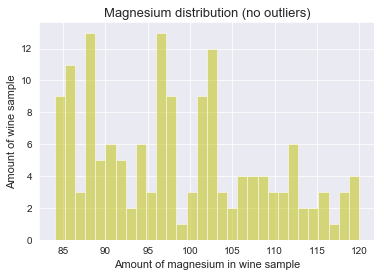

In [41]:
plt.figure(figsize=(6,4))
plt.title('Magnesium distribution (no outliers)',fontsize=13) 
plt.hist(data[data['magnesium'].isin(useq_freq_destrib['magnesium'].unique())]['magnesium'],bins=30,color='y',alpha=0.5)
plt.ylabel('Amount of wine sample',fontsize=11)
plt.xlabel('Amount of magnesium in wine sample',fontsize=11)
plt.show()

**`Меры изменчивости (насколько разнообразны наблюдения)`**

In [42]:
# размах, межквартильный размах (исключаем выбросы), дисперсия и стандартное отклонение
rasmah = data['magnesium'].max()-data['magnesium'].min()
quart_rasmah = np.percentile(data['magnesium'],75)-np.percentile(data['magnesium'],25)
disp1 = data['magnesium'].std()**2
std1 = data['magnesium'].std()
avg = (freq_destrib['magnesium']*freq_destrib['cnt']).sum()/float(freq_destrib['cnt'].sum())
disp2 = (freq_destrib['cnt']*((freq_destrib['magnesium']-avg)**2)).sum()/(float(freq_destrib['cnt'].sum())-1.)
std2 = disp2**0.5
print ('''
        rasmah = {},\n
        quartile rasmah = {}, \n
        dispersia(pandas func) = {},\n
        std.err(pandas func) = {},\n
        dispersia(manually) = {},\n
        std.err(manually) = {}
'''.format(rasmah, quart_rasmah, disp1, std1, disp2, std2))


        rasmah = 92.0,

        quartile rasmah = 19.0, 

        dispersia(pandas func) = 203.9893353646924,

        std.err(pandas func) = 14.282483515295665,

        dispersia(manually) = 203.98933536469244,

        std.err(manually) = 14.282483515295665



In [43]:
# если распределение нормальное, то 68% наблюдений будет находится в интервале avg+/-std
data[(data['magnesium']>=(data['magnesium'].mean()-data['magnesium'].std()))&\
     (data['magnesium']<=(data['magnesium'].mean()+data['magnesium'].std()))].shape[0]/float(data.shape[0])

0.7415730337078652

In [44]:
# Важно помнить, что при расчете дисперсии для выборки в знаменателе из общего числа наблюдений вычитается 1
# Корень из дисперсии ГС называется среднеквадратичным отклонением, для выборки - стандертным отклонением
#

** Средства визуализации данных **

**`Столбиковая диаграмма`**

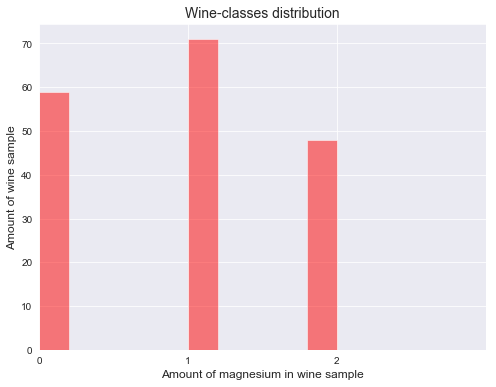

In [45]:
data['target']=data['wine_class'].apply(lambda x:int(x.strip().split('_')[-1]))
plt.figure(figsize=(8,6))
plt.title('Wine-classes distribution',fontsize=14) 
plt.hist(data['target'],color='r',alpha=0.5)
plt.xticks(range(0, 3))
plt.xlim(0,3)
plt.ylabel('Amount of wine sample',fontsize=12)
plt.xlabel('Amount of magnesium in wine sample',fontsize=12)
plt.show()

In [46]:
freq_table = ((data['target'].value_counts()).reset_index()).rename(columns={'index':'wine_class',\
                                                                                 'target':'class_cnt'}).sort_values(['wine_class'])
freq_table['classes_freq'] = freq_table['class_cnt']/float(data.shape[0])
freq_table

,wine_class,class_cnt,classes_freq
1,0,59,0.331461
0,1,71,0.398876
2,2,48,0.269663


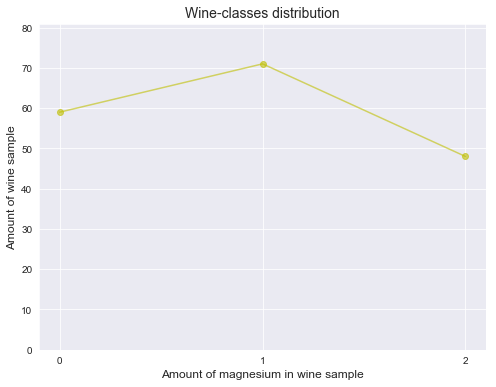

In [47]:
#data['target']=data['wine_class'].apply(lambda x:int(x.strip().split('_')[-1]))
plt.figure(figsize=(8,6))
plt.title('Wine-classes distribution',fontsize=14) 
plt.plot(freq_table['wine_class'],freq_table['class_cnt'],'yo-',alpha=0.6)
plt.xticks(range(0, 3))
plt.ylim(0,freq_table['class_cnt'].max()+10)
plt.ylabel('Amount of wine sample',fontsize=12)
plt.xlabel('Amount of magnesium in wine sample',fontsize=12)
plt.show()

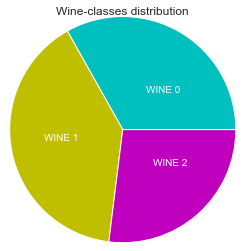

In [48]:
#import matplotlib
#matplotlib.rcParams['font.size'] = 11.0
plt.title('Wine-classes distribution',fontsize=12)
ttt = plt.pie(freq_table['class_cnt'].values, \
                          labels=['WINE %d'%i for i in freq_table['wine_class'].values], \
                          colors=['c','y','m'],radius=1.3,labeldistance=0.4, textprops=dict(color="w"))

#for autotext in autotexts:
#    autotext.set_color('white')

plt.show()

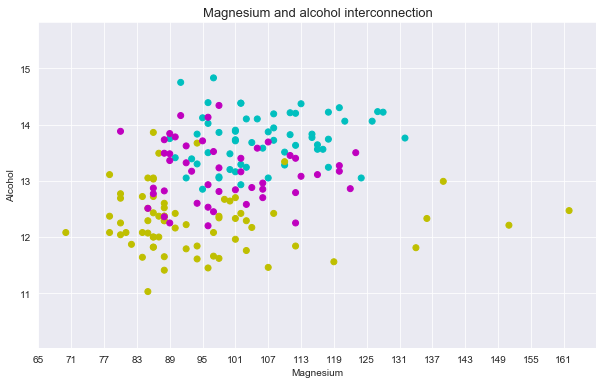

In [49]:
#plt.scatter(x, y, s=None, c=None,
plt.figure(figsize=(10,6))
plt.title('Magnesium and alcohol interconnection',fontsize=13)
plt.ylabel('Alcohol')
plt.xlabel('Magnesium')
plt.xticks(list(range(int(data['magnesium'].min()-5),int(data['magnesium'].max()+5), \
                      int((data['magnesium'].max()+10-data['magnesium'].min())//15))))
plt.ylim(data['alcohol'].min()-1,data['alcohol'].max()+1)
plt.xlim(data['magnesium'].min()-5,data['magnesium'].max()+5)
colors = data['target'].replace({0:'c',1:'y',2:'m'}).values
plt.scatter(data['magnesium'],data['alcohol'], c=colors)

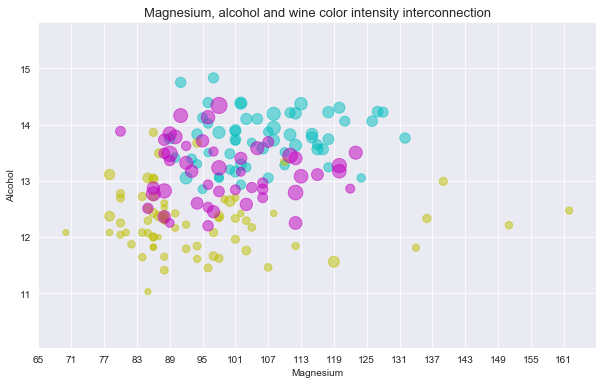

In [50]:
#plt.scatter(x, y, s=None, c=None,
plt.figure(figsize=(10,6))
plt.title('Magnesium, alcohol and wine color intensity interconnection',fontsize=13)
plt.ylabel('Alcohol')
plt.xlabel('Magnesium')
plt.xticks(list(range(int(data['magnesium'].min()-5),int(data['magnesium'].max()+5), \
                      int((data['magnesium'].max()+10-data['magnesium'].min())//15))))
plt.ylim(data['alcohol'].min()-1,data['alcohol'].max()+1)
plt.xlim(data['magnesium'].min()-5,data['magnesium'].max()+5)
colors = data['target'].replace({0:'c',1:'y',2:'m'}).values
plt.scatter(data['magnesium'],data['alcohol'], c=colors, s=[20*i for i in data['color_intensity'].values],alpha=0.5)

In [51]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0,0


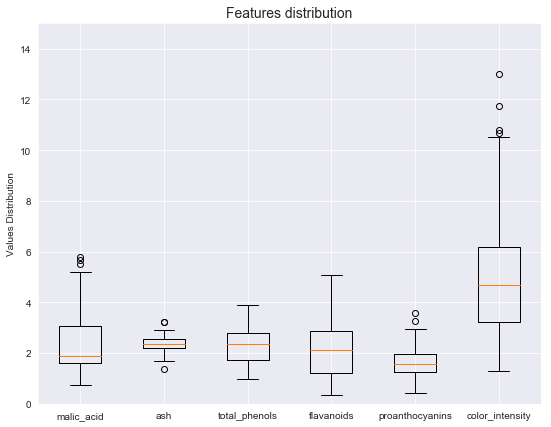

In [52]:
plt.figure(figsize=(9,7))
plt.title('Features distribution',fontsize=14)
plt.ylabel('Values Distribution')
plt.boxplot(data[['malic_acid','ash','total_phenols','flavanoids','proanthocyanins','color_intensity']].values,\
           labels=['malic_acid','ash','total_phenols','flavanoids','proanthocyanins','color_intensity'],\
           meanline=True)
plt.ylim(0,15)
plt.show()

In [53]:
#sns pallets

# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, 
# Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r,
# Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r,
# PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, 
# RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia,
# Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
# autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, 
# coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray,
# gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, 
# gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r,
# hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, 
# nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket,
# rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b,
# tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r,
#viridis, viridis_r, vlag, vlag_r, winter, winter_r

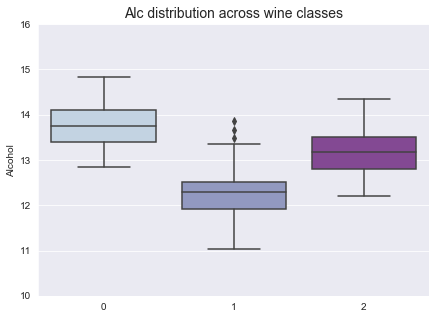

In [54]:
plt.figure(figsize=(7,5))
plt.title('Alc distribution across wine classes',fontsize=14)
plt.ylabel('Alcohol')
sns.boxplot(x=data['target'].values,y=data['alcohol'].values,\
            saturation=0.8, palette="BuPu")
plt.ylim(10,16)
plt.show()

In [55]:
# Data analisys prasupposes data-normalisation

def column_normalizer(x):
    return (x-x.mean())/x.std()

cols_to_normalize = set(data.columns)-set(['wine_class','target'])
data2=data[:]
for col in cols_to_normalize:
    data2[col]=column_normalizer(data2[col])

In [57]:
# Нормальное распределение
# 68% - 1 sigm
# 95% - 2 sigms
# 99% - 3 sigm

#null hypothesis = `sample comes from a normal distribution`
print(st.normaltest(data2['alcohol']))
data2.head()

NormaltestResult(statistic=15.963552699056704, pvalue=0.00034163202531285443)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class,target
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,class_0,0
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,class_0,0
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,class_0,0
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,class_0,0
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,class_0,0


In [60]:
def removing_outliers(data,feat):
    def print_sigmas(tmp,feat):
        avg = tmp[feat].mean()
        std=tmp[feat].std()
        s1 = round(tmp[(tmp[feat]<=(avg+std))&(tmp[feat]>=(avg-std))].shape[0]/float(tmp.shape[0]),2)
        s2 = round(tmp[(tmp[feat]<=(avg+2*std))&(tmp[feat]>=(avg-2*std))].shape[0]/float(tmp.shape[0]),2)
        s3 = round(tmp[(tmp[feat]<=(avg+3*std))&(tmp[feat]>=(avg-3*std))].shape[0]/float(tmp.shape[0]),2)
        print ('\n'.join(['\t\t'.join(i) for i in zip(\
                                                      map(str,['metric',s1,s2,s3]),\
                                                      map(str,['reference',0.68,0.95,0.99]),\
                                                      map(str,['if_equal',s1==0.68,s2==0.95,s3==0.99])
                                                     )\
                         ])\
              )
        
    # 5-10% lowest, highest values
    q3 = np.percentile(data[feat].values,3)
    q97 = np.percentile(data[feat].values,97)
    tmp=data[(data[feat]>=q3)&(data[feat]<=q97)]
    test,pval = st.normaltest(tmp[feat])
    if pval>=0.05:
        print('Normal distribution found (1)')
        print_sigmas(tmp,feat)
        return tmp
    
    
    # [q25-1.5*(q75-q25), q75+1.5*(q75-q25)]
    q25 = np.percentile(data[feat].values,25)
    q75 = np.percentile(data[feat].values,75)
    upper=q75+1.5*(q75-q25)
    lower=q25-1.5*(q75-q25)
    tmp = data[(data[feat]<=upper)&(data[feat]>=lower)]
    test,pval = st.normaltest(tmp[feat])
    if pval>=0.05:
        print('Normal distribution found (2)')
        print_sigmas(tmp,feat)
        return tmp
    print('Normal distribution is not found')
    return tmp
    
    

In [61]:
for feature in cols_to_normalize:
    print(feature)
    check = removing_outliers(data2,feature)
    print()

od280/od315_of_diluted_wines
Normal distribution is not found

nonflavanoid_phenols
Normal distribution is not found

flavanoids
Normal distribution is not found

color_intensity
Normal distribution is not found

ash
Normal distribution found (1)
metric		reference		if_equal
0.63		0.68		False
0.97		0.95		False
1.0		0.99		False

proanthocyanins
Normal distribution found (1)
metric		reference		if_equal
0.67		0.68		False
0.97		0.95		False
1.0		0.99		False

alcalinity_of_ash
Normal distribution found (2)
metric		reference		if_equal
0.66		0.68		False
0.95		0.95		True
1.0		0.99		False

magnesium
Normal distribution is not found

hue
Normal distribution is not found

total_phenols
Normal distribution is not found

alcohol
Normal distribution is not found

malic_acid
Normal distribution is not found

proline
Normal distribution is not found



- Если известно, что выборка скорее всего принадлежит к совокупности с нормальным распределением, для описания ГС можно использовать выборочное среднее и выборочное стандартное отклонение
- Если распределение в совокупности отличается от нормального, следует использовать медиану, 25-й и 75-й процентили

- Для характеристики точности выборочных оценок используют стандартную ошибку

**Стандартная ошибка среднего (ЦПТ)**

(оценка точности, с которой выборочное среднее характеризует значение среднего по всей совокупности)

***ЦПТ*** 
*  Выборочные средние имеют приближенно нормальное распределение независимо от распределения исходной совокупности, из которой были извлечены выборки
*  Среднее значение всех возможных выборочных средних равно среднему исходной совокупности
*  Стандартное отклонение всех возможных средних по выборкам, называемое стандартной ошибкой среднего, зависит как от стандартного отклонения совокупности, так и от объема выборки

*Стандартная ошибка среднего* (оценка точности выборочного среднего как меры среднего ГС): 
$$
{s_{sample}\over\sqrt(n_{sample})}
$$

**Общие замечания о *параметрических* критериях**

Все критерии, основанные на оценке параметров распределения (они называются параметрическими), применимы только в случае, если данные подчиняются соответствующему распределению (чаще всего речь идет о нормальном распределении)

**`p-value`** - вероятность ошибочно отвергнуть нулевую гипотезу об отсутствии различий (Ошибка первого рода), т.е. найти различия там, где их нет

In [62]:
normal_feats = ['alcalinity_of_ash','ash','proanthocyanins']
notnormal_feats = ['proline','flavanoids','magnesium','hue','alcohol','color_intensity','malic_acid','total_phenols']

**Меры различий для несвязанных выборок**

`Дисперсионный анализ (Критерий Р.Фишера) - сравнение нескольких групп`

$$ \sum_{i=1}^{n_j} (x_{i,j}-M)^2 = \sum_{i=1}^{n_j} (M_j-M)^2 + \sum_{i=1}^{n_j} (x_{i,j}-M_j)^2 $$ 

$$ S_{total}^2 = S_{btwGr}^2 + S_{wthGr}^2 $$  

$$ F_{df_{btwGr},df_{wthGr}} = {{S_{btwGr}^2 \over (J-1)} \over {S_{wthGr}^2 \over (N-J)}} $$

Необходимое допущение: равенство дисперсий (далее будем использовать критерий **`Levene`**)

In [63]:
#manually
n=data2.shape[0]
m=len(data2['target'].unique())
avg = (data2.groupby(['target'])['alcohol'].mean()).mean()

tmp = pd.merge((data2.groupby(['target'])['alcohol'].mean()).reset_index().rename(columns={'alcohol':'avg'}),\
              (data2.groupby(['target'])['alcohol'].count()).reset_index().rename(columns={'alcohol':'n'}),\
              how='inner',on='target')
dmej = ((tmp['n']*((tmp['avg']-avg)**2)).sum())/float(m-1.)

tmp = pd.merge(data2[['target','alcohol']],\
         (data2.groupby(['target'])['alcohol'].mean()).reset_index().rename(columns={'alcohol':'avg'}),
         how='inner',on=['target'])
dvnu=(((tmp['alcohol']-tmp['avg'])**2).sum())/float(n-m)

dtot = (((data2['alcohol']-avg)**2).sum())/float(n-1.)
print((float(m-1.)*dmej+float(n-m)*dvnu),(float(n-1.)*dtot))
criteria = dmej/dvnu
print(criteria)

177.92295926142646 177.9229592614264
136.23824616190208


In [64]:
def anova_ex(df,cat,col,alpha=0.05):
    samples = [i[col].values for j,i in df.groupby(cat) if i.shape[0]>0]
    #null hypothesis that all input samples are from populations with equal variances
    stat,pval = st.levene(*samples)
    if pval<alpha:
        print('Unable to perform analysis, samples are of different variance\nSplit paramater=%s'%col)
    else:
        print('Able to perform analysis, samples are out of populations with equal variances')
        #null hypothesis that two or more groups have the same population mean
        statistic, pval = st.f_oneway(*samples)
        if pval<alpha:
            print('Groups are different on parameter = {}, pvalue = {}'.format(col,round(pval,4)))
        else:
            print('Groups are the same on parameter = {}, pvalue = {}'.format(col,round(pval,4)))
        return (statistic,pval)

In [65]:
for feature in normal_feats:
    res = anova_ex(data2,'target',feature)
    print()

Able to perform analysis, samples are out of populations with equal variances
Groups are different on parameter = alcalinity_of_ash, pvalue = 0.0

Unable to perform analysis, samples are of different variance
Split paramater=ash

Able to perform analysis, samples are out of populations with equal variances
Groups are different on parameter = proanthocyanins, pvalue = 0.0



`Критерий Стьюдента` 

(в случае сравнений 2х групп, критерий Стьюдента - вариация критерия Фишера $$ F = t^2$$)

*  Нулевая гипотеза: средние двух групп равны

$$t_{крит} = {{\bar{X_1}-\bar{X_2}} \over {\sqrt{{s_{1}^2\over n_1} + {s_{2}^2\over n_2}}}} $$

Критерий используется в методах множественного сравнения, для определения различий между группами, признанными, например, дисперсионным анализом, различными

*`Поправка Бонферрони`* : сокращение уровня значимости пропорционально числу групп

*`критерий Ньюмена–Кейлса`* : более точная оценка вероятности, чем поправка Бонферрони

In [96]:
# two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values
samples = {j:i['alcalinity_of_ash'].values for j,i in data2.groupby(['target']) if i.shape[0]>0}
print(len(samples))
inds = list(samples.keys())
combs = list(combinations(inds,2))
pvals = []
for pair in combs:
    statistic,pvalue = st.ttest_ind(samples[pair[0]],samples[pair[1]])
    pvals.append(pvalue)
print(pvals)
if_reject,corr_pvals,_,alpha = multitest.multipletests(pvals,method='bonferroni')
for pair,rej in zip(combs,if_reject):
    if rej:
        print ('class_{} VS class_{} are different'.format(pair[0],pair[1]))
    else:
        print ('class_{} VS class_{} are same'.format(pair[0],pair[1]))
# true for hypothesis that can be rejected for given alpha

3
[1.626380152160771e-08, 2.2334034595708507e-15, 0.03519208744141724]
class_0 VS class_1 are different
class_0 VS class_2 are different
class_1 VS class_2 are same


**Качественные признаки**
-  описываются долей p

Независимые испытания Бернулли
  *   Каждое отдельное испытание имеет ровно два возможныхвзаимно исключающих исхода
  *   Вероятность данного исхода одна и та же в любом испытании
  *   Все испытания независимы друг от друга
  
Стандартное отклонение: $$ \sigma ={\sqrt{p*(1-p)}} $$

Стандартная ошибка доли: $$ \sigma_{\bar{p}} = {\sqrt{p*(1-p)\over n}} $$

***`z-критерий` и сравнение долей***

$$ z = {{\bar{p_1}-\bar{p_2}}\over \sqrt{{\bar{p_1}*(1-\bar{p_1})\over n_1} + {\bar{p_2}*(1-\bar{p_2})\over n_2}}} $$
z - приближено стандартным нормальным распределением

Оценка я может оказаться заниженной, из-за дискретности z

`Поправка Йеитса` на непрерывность:

$$ z = { {|\bar{p_1}-\bar{p_2}| - {1\over2}*({1\over n_1}+{1\over n_2}) } \over {\sqrt{\bar{p}*(1-\bar{p})*({1\over n_1} + {1\over n_2})}} }$$

In [160]:
#create experimental binary feature
data2['alhocol_bin']=(data2['alcohol']>data2['alcohol'].mean()).astype(int)
tmp = pd.merge((data2.groupby(['target'])['alhocol_bin'].count()).reset_index().rename(columns={'alhocol_bin':'n'}),\
         (data2.groupby(['target'])['alhocol_bin'].sum()).reset_index().rename(columns={'alhocol_bin':'fact'}),\
        how='inner',on=['target'])
succeses = tmp['fact'].values[:2]
trials = tmp['n'].values[:2]
stat,pval = proportion.proportions_ztest(succeses,trials)
alpha = 0.05
if pval<alpha:
    print('the shares are different on pvalue=%.4f'%pval)
else:
    print('the shares are different on pvalue=%.4f'%pval)

the shares are different on pvalue=0.0000


** Непараметрические критерии **

`Хи-Квадрат` (χ2)

- Гипотеза об отсутсствии различий между группами

$$ χ2 = {\sum_i^n \sum_j^m {(p_{Observed_{i,j}}-p_{Expected_{i,j}})^2\over p_{Expected_{i,j}}}} $$ 

- для таблиц сопряженности 2х2 χ2 дает завышенную оценку, что вызвано тем, что теоретическое распределение χ2 непрерывно, тогда как набор вычисленных значений χ2 дискретен

Применяют `поправку Йеитса` (только для матриц 2х2 ):

$$ χ2 = {\sum_i^n \sum_j^m {{|p_{Observed_{i,j}}-p_{Expected_{i,j}}| - {1\over 2}} \over p_{Expected_{i,j}}}} $$

In [172]:
tmp['not_fact'] = tmp['n']-tmp['fact']
total_sum = tmp['n'].sum()
cols_sum = ((tmp[['fact','not_fact']].values).sum(axis=0)).reshape((1,2))
observed = tmp[['fact','not_fact']].values
expected = (((tmp['n'].values).reshape((tmp.shape[0],1))).dot(cols_sum))*(1./total_sum)
tmp

,target,n,fact,not_fact
0,0,59,57,2
1,1,71,8,63
2,2,48,27,21


In [181]:
#f_obs, f_exp
alpha=0.05
stat, pval = st.chisquare(observed.flatten(),expected.flatten(),ddof=(3-1)*(2-1))
if pval<alpha:
    print('Groups are different on pvalue = {}'.format(round(pval,4)))
else:
    print('Groups are same on pvalue = {}'.format(round(pval,4)))

Groups are different on pvalue = 0.0


In [179]:
?? st.chisquare

In [170]:
observed

array([[57,  2],
       [ 8, 63],
       [27, 21]])

In [171]:
expected

array([[30.49438202, 28.50561798],
       [36.69662921, 34.30337079],
       [24.80898876, 23.19101124]])

In [176]:
(observed).flatten()

array([57,  2,  8, 63, 27, 21])

In [ ]:
#байесовская статистика?